* 1.) Use a loop or recursion to print out only the Magnitudes 
* 2.) Select and Print the observation with the highest magnitude and its associated location 
* 3.) Make a histogram of the frequencies of earthquakes in each city. Did any have more than one?

In [1]:
import json
f = open('all_hour.geojson')
data = json.load(f)
print(type(data))
data.keys()


<class 'dict'>


dict_keys(['type', 'metadata', 'features', 'bbox'])

In [2]:
data

{'type': 'FeatureCollection',
 'metadata': {'generated': 1570553658000,
  'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.geojson',
  'title': 'USGS All Earthquakes, Past Hour',
  'status': 200,
  'api': '1.8.1',
  'count': 14},
 'features': [{'type': 'Feature',
   'properties': {'mag': 0.59,
    'place': '10km WNW of The Geysers, CA',
    'time': 1570553385240,
    'updated': 1570553480214,
    'tz': -480,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc73288815',
    'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/nc73288815.geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'automatic',
    'tsunami': 0,
    'sig': 5,
    'net': 'nc',
    'code': '73288815',
    'ids': ',nc73288815,',
    'sources': ',nc,',
    'types': ',geoserve,nearby-cities,origin,phase-data,',
    'nst': 15,
    'dmin': 0.002426,
    'rms': 0.02,
    'gap': 67,
    'magType': 'md',
    'type': 'earthquake'

In [3]:
data['type']

'FeatureCollection'

In [4]:
data['metadata']

{'generated': 1570553658000,
 'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.geojson',
 'title': 'USGS All Earthquakes, Past Hour',
 'status': 200,
 'api': '1.8.1',
 'count': 14}

In [5]:
l = len(data['features'])

In [6]:
magnitudes = []

for i in range(0,l):
    magnitudes.append(data['features'][i]['properties']['mag'])
print(i, magnitudes) 

13 [0.59, 1.3, 1.4, 1.79, 1.92, 0.85, 0.15, 0.47, 1.9, 1.51, 2, 1.6, 2.1, 1.7]


In [7]:
max(magnitudes)

2.1

In [8]:
magnitudes[-2]

2.1

In [9]:
data['features'][-2]['properties']['place']

'60km WSW of Talkeetna, Alaska'

In [10]:
data['bbox']

[-151.1405, 34.1235, 0, -116.9763333, 68.7761, 51]

In [11]:
# Make a histogram of the frequencies of earthquakes in each city. Did any have more than one?
earthquakes = {}

for i in range(0,l):
    loc = data['features'][i]['properties']['place']
    mag = data['features'][i]['properties']['mag']
    freq = {i: [mag,loc]}
    earthquakes.update(freq)

locations = {'meta': earthquakes}


In [12]:
import pandas as pd
df = pd.DataFrame.from_dict(locations['meta'], orient='index', columns = ['mag','location'])
df

,mag,location
0,0.59,"10km WNW of The Geysers, CA"
1,1.30,"17km SSW of Big Lake, Alaska"
2,1.40,"76km E of Cape Yakataga, Alaska"
3,1.79,"10km WNW of The Geysers, CA"
4,1.92,"22km N of Barstow, CA"
5,0.85,"3km NNE of Fontana, CA"
6,0.15,"2km NE of The Geysers, CA"
7,0.47,"17km E of Little Lake, CA"
8,1.90,"17km SW of Valdez, Alaska"
9,1.51,"16km NE of Brooktrails, CA"


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
display(df['location'].nunique())
display(len(df))

13

14

In [14]:
df[df['location'].duplicated(keep=False)]

,mag,location
0,0.59,"10km WNW of The Geysers, CA"
3,1.79,"10km WNW of The Geysers, CA"


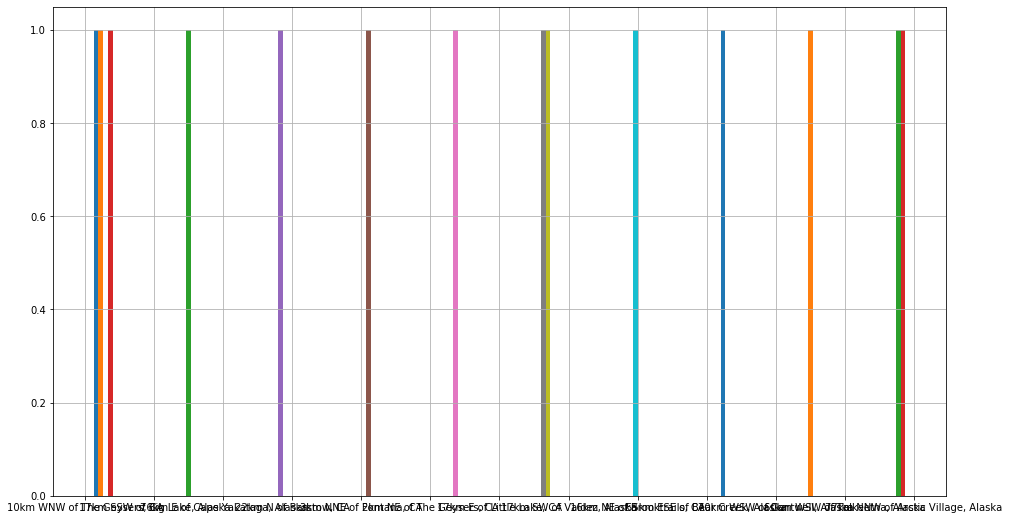

In [15]:
df['location'].hist(figsize= (16,9));

In [16]:
states = []
for i in range(len(df)):
    states.append(df['location'][i][-2:])
state = {'state':states}
state

{'state': ['CA',
  'ka',
  'ka',
  'CA',
  'CA',
  'CA',
  'CA',
  'CA',
  'ka',
  'CA',
  'ka',
  'ka',
  'ka',
  'ka']}

In [17]:
df2 = pd.DataFrame.from_dict(state)

In [18]:
df3 = df.join(df2)

In [19]:
df3

,mag,location,state
0,0.59,"10km WNW of The Geysers, CA",CA
1,1.30,"17km SSW of Big Lake, Alaska",ka
2,1.40,"76km E of Cape Yakataga, Alaska",ka
3,1.79,"10km WNW of The Geysers, CA",CA
4,1.92,"22km N of Barstow, CA",CA
5,0.85,"3km NNE of Fontana, CA",CA
6,0.15,"2km NE of The Geysers, CA",CA
7,0.47,"17km E of Little Lake, CA",CA
8,1.90,"17km SW of Valdez, Alaska",ka
9,1.51,"16km NE of Brooktrails, CA",CA


In [20]:
df3 = df3.groupby(by='state').count()
df3

,mag,location
state,,
CA,7,7
ka,7,7


In [21]:
df3.reset_index()

,state,mag,location
0,CA,7,7
1,ka,7,7


In [22]:
df3.drop('mag',axis=1,inplace=True)

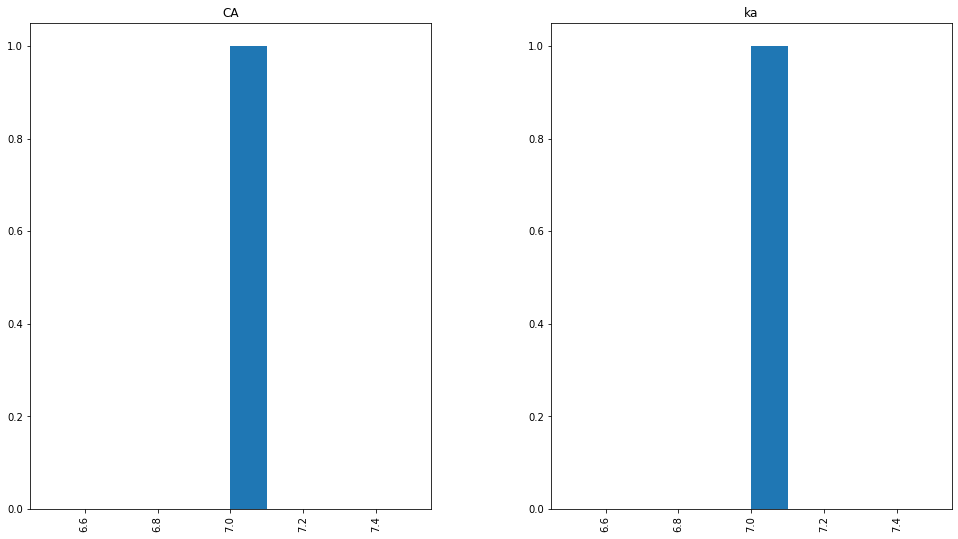

In [23]:
df3.hist(figsize=(16,9), by ='state');